- **customerID** – Unique identifier for each customer, typically used for tracking and identification.  
- **OnlineBackup** – Indicates whether the customer has online backup service (Yes, No, No internet service).  
- **DeviceProtection** – Indicates whether the customer has device protection service (Yes, No, No internet service).  
- **TechSupport** – Indicates whether the customer has access to technical support (Yes, No, No internet service).  
- **StreamingTV** – Indicates whether the customer has TV streaming service (Yes, No, No internet service).  
- **StreamingMovies** – Indicates whether the customer has movie streaming service (Yes, No, No internet service).  
- **Contract** – Type of customer contract (Month-to-month, One year, Two year); this feature is important for customer loyalty.  
- **PaperlessBilling** – Indicates whether the customer receives paperless billing (Yes, No).  
- **PaymentMethod** – Customer’s payment method (Credit card, Bank transfer, Electronic check, Mailed check).  
- **MonthlyCharges** – Monthly amount paid by the customer.  
- **TotalCharges** – Total amount paid by the customer to date.  
- **Churn** – Indicates whether the customer has left the company (Yes = churned, No = still active).  
- **gender** – Customer’s gender (Male or Female).  
- **SeniorCitizen** – Indicates whether the customer is a senior citizen (1 = Yes, 0 = No).  
- **Partner** – Indicates whether the customer has a partner (Yes, No).  
- **Dependents** – Indicates whether the customer has dependents (Yes, No).  
- **tenure** – Number of months the customer has been with the company.  
- **PhoneService** – Indicates whether the customer has phone service (Yes, No).  
- **MultipleLines** – Indicates whether the customer has multiple phone lines (Yes, No, No phone service).  
- **InternetService** – Type of internet service the customer has (DSL, Fiber optic, No internet).  
- **OnlineSecurity** – Indicates whether the customer has internet security service (Yes, No, No internet service).

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as personr

#### Display a list of installed ODBC drivers for connecting to databases

In [2]:
import pyodbc
print(pyodbc.drivers())

['SQL Server', 'ODBC Driver 18 for SQL Server', 'Microsoft Access Driver (*.mdb, *.accdb)', 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)', 'Microsoft Access Text Driver (*.txt, *.csv)', 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)']


### This code checks whether a connection to SQL Server can be established on the specified IP and port 1433.


In [3]:
import socket
try:
    s = socket.create_connection(("192.168.174.5", 1433), timeout=3)
    print("✅ SQL Server is reachable!")
except Exception as e:
    print("❌ Connection failed:", e)

✅ SQL Server is reachable!


### This code connects to a SQL Server database using SQLAlchemy and pyodbc and inserts the data from the desired table into a Pandas dataframe.

In [4]:
from sqlalchemy import create_engine

username = 'ccna'
password = 'Hamed/.1234sql'
server_ip = '192.168.174.5'
database = 'TelcoData'

conn_str = (
    f"mssql+pyodbc://{username}:{password}"
    f"@{server_ip}/{database}?driver=ODBC+Driver+18+for+SQL+Server&Encrypt=no"
)

engine = create_engine(conn_str)
# df = pd.read_sql("SELECT TOP 100 * FROM [WA_Fn-UseC_-Telco-Customer-Churn]", engine,)
df = pd.read_sql("SELECT * FROM [WA_Fn-UseC_-Telco-Customer-Churn]", engine,)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.2,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.6,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.4,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## Part One (Data Analysis,Analytical Tasks)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [6]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7044,7044,7044,7044,7044,7044,7044,7044,7044,7044,...,7044,7044,7044,7044,7044,7044,7044,7044,7044,7044
unique,7044,3,3,3,3,74,3,4,4,4,...,4,4,4,4,4,3,5,1586,6532,3
top,customerID,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,20.05,20.2,No
freq,1,3555,5901,3641,4933,613,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,61,11,5174


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
describe_all = df.describe(include='all')
print(describe_all)

        customerID gender SeniorCitizen Partner Dependents tenure  \
count         7044   7044          7044    7044       7044   7044   
unique        7044      3             3       3          3     74   
top     customerID   Male             0      No         No      1   
freq             1   3555          5901    3641       4933    613   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count          7044          7044            7044           7044  ...   
unique            3             4               4              4  ...   
top             Yes            No     Fiber optic             No  ...   
freq           6361          3390            3096           3498  ...   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7044        7044        7044            7044   
unique                4           4           4               4   
top                  No          No          No              No   
freq               3

#### count = 7044
The total number of rows that have a non-empty value (i.e., are not NaN)
#### unique = 4
The number of unique values ​​in this column (e.g. 4 different contract types)
#### top = Month-to-month
The most frequent value in this column.
#### freq = 3875
Number of times the repeated value appeared

In [9]:
describe_column = df['Contract'].describe()
print(describe_column )
# df['Contract'].unique()

count               7044
unique                 4
top       Month-to-month
freq                3875
Name: Contract, dtype: object


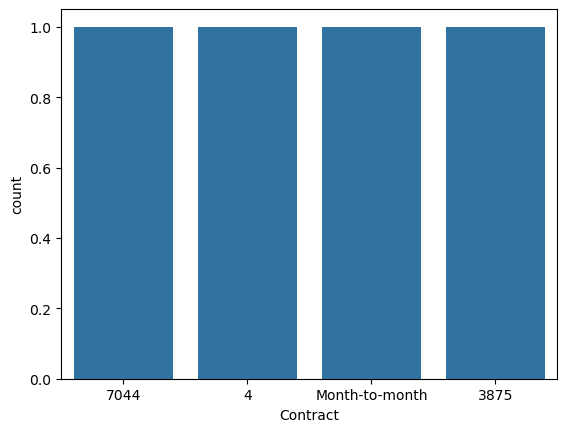

In [10]:
sns.countplot(x=describe_column,data=df)
plt.show()

#### Identify a piece of data that shows which users are collaborating or disconnecting:

In [11]:
df.loc[5:10, ['customerID', 'Churn']]

,customerID,Churn
5,9305-CDSKC,Yes
6,1452-KIOVK,No
7,6713-OKOMC,No
8,7892-POOKP,Yes
9,6388-TABGU,No
10,9763-GRSKD,No


In [12]:
# #### This command converts the entire data frame into a NumPy array, ready for modeling or numerical processing:
# df.to_numpy()

In [13]:
df.isna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7042,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### This code plots three histograms side by side to compare the distribution of the 'Churn, tenure, and Contract' attributes:

In [15]:
Churn=df['Churn']
tenure=df['tenure']
Contract=df['Contract']

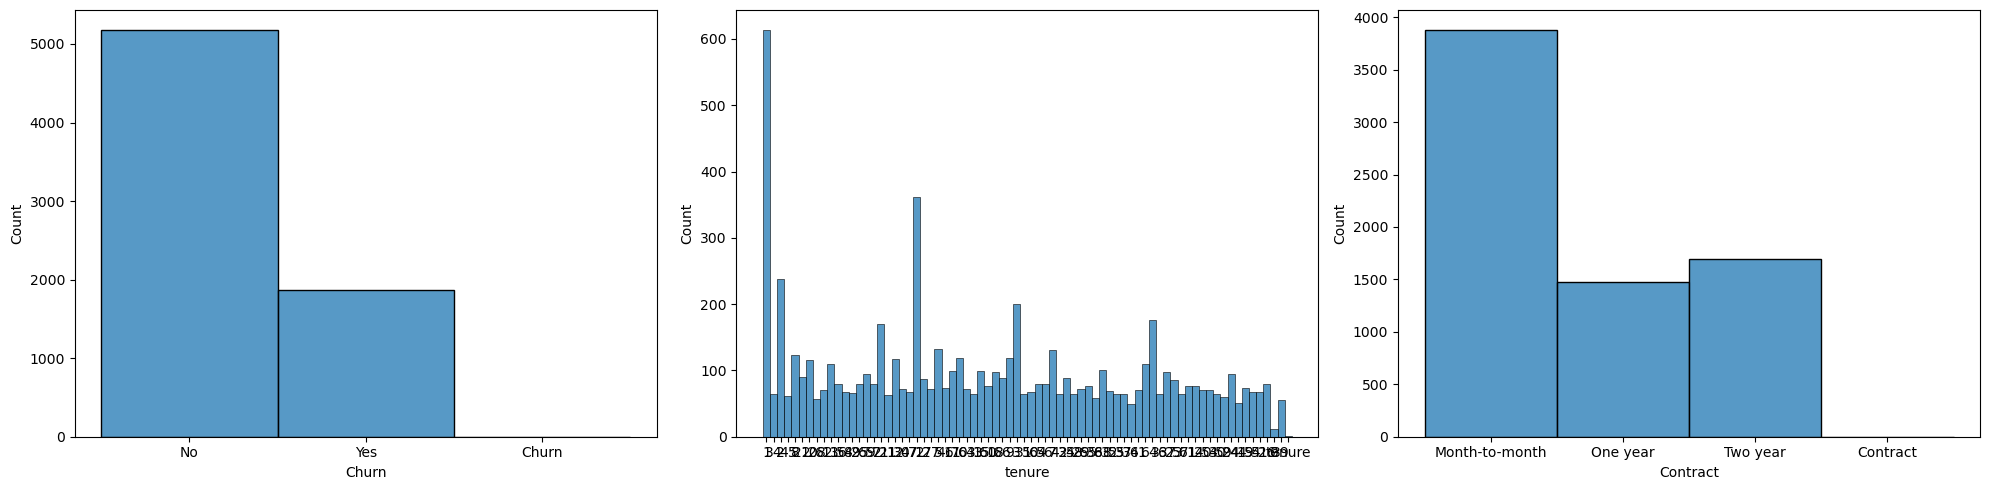

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))

# Plotting graphs on each axis
sns.histplot(df["Churn"], ax=axes[0], kde=False)
sns.histplot(df["tenure"], ax=axes[1], kde=False)
sns.histplot(df["Contract"], ax=axes[2], kde=False)

plt.tight_layout()
plt.show()

# A histogram displays a column:
# sns.countplot(x=Contract,data=df)
# plt.show()

In [17]:
# Shows what percentage of missing values each column has.
df.isna().sum() / df.shape[0] * 100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [18]:
# Used a for loop to get unique values for three columns.
boolean_cols =  ['Contract','tenure','Churn']
for col in boolean_cols :
    print(sorted(df[col].unique()) ) # or nunique

['Contract', 'Month-to-month', 'One year', 'Two year']
['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '8', '9', 'tenure']
['Churn', 'No', 'Yes']


In [20]:

# # # Make sure your data has valid values before calculating correlation
# # # Example with sample data:
# df = pd.DataFrame(np.random.rand(10, 21), columns=['customerID',
# 'gender',
# 'SeniorCitizen',
# 'Partner',
# 'Dependents',
# 'tenure',
# 'PhoneService',
# 'MultipleLines',
# 'InternetService',
# 'OnlineSecurity',
# 'OnlineBackup',
# 'DeviceProtection',
# 'TechSupport',
# 'StreamingTV',
# 'StreamingMovies',
# 'Contract',
# 'PaperlessBilling',
# 'PaymentMethod',
# 'MonthlyCharges',
# 'TotalCharges',
# 'Churn'])

# # Calculate correlation matrix
# corr = df.corr()

# # Check if correlation matrix has valid values
# if corr.size > 0 and not corr.isna().all().all():
#     # Plot heatmap
#     sns.heatmap(corr)
# else:
#     print("Correlation matrix is empty or contains only NaN values")
#     # You might want to investigate your original data

In [21]:
# df_encoded = df.copy()
# for col in df.select_dtypes(include='object').columns:
#     df_encoded[col] = df_encoded[col].astype('category').cat.codes

# corr = df_encoded.corr()
# sns.heatmap(corr, annot=False, cmap='coolwarm')

In [22]:
# data_numeric= df.select_dtypes(include='number').corr()

In [23]:
print(df.select_dtypes(include='number').nunique())

Series([], dtype: float64)


In [24]:
# corr= data_numeric.corr()

In [25]:
# sns.heatmap(corr)

##### To get the start date of each customer, we need to subtract the number of months in which the tenure was recorded from today's date or any date we want, and we get the start date of each customer And to find out the date of departure of each customer, we need to add the number of months in the tenure to the start date, provided that the number 1 is recorded in the churn column, which means the customer left, and with this method, the departure date of each customer is recorded in the end_date column.
### This tool is used for time-based analysis such as:
- Examining churn rates over different months
- Analyzing the behavior of new customers versus existing customers
- Creating group charts

1. First we need to convert that reference date to datetime, because you want to perform date operations on it.
Think about it: What function in pandas is there that converts the string ``2025-07-21'' to a datetime object?
2. Now for each row (customer), you want to subtract the number of months from that date.
Question: Does pandas have a function that can subtract "a certain number of months" from a date? Not days, not weeks, just months?
3.Now that you have found the right function to subtract the month, how do you apply it to all customers (all rows in the dataframe)?
For example, with `.apply()` or with a direct vector operation.

In [26]:
# Assuming df is already defined with a 'tenure' column containing numeric values And we have to choose the date of the merger.
current_date = pd.to_datetime("2025-08-29")

# Make sure tenure column contains numeric values and handle any non-numeric values
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

# Convert tenure to integer before applying DateOffset
# Using fillna(0) to handle any NaN values that might result from the conversion
df['start_date'] = df['tenure'].fillna(0).apply(lambda x: current_date - pd.DateOffset(months=int(x)))

In [27]:
df.dtypes

customerID                  object
gender                      object
SeniorCitizen               object
Partner                     object
Dependents                  object
tenure                     float64
PhoneService                object
MultipleLines               object
InternetService             object
OnlineSecurity              object
OnlineBackup                object
DeviceProtection            object
TechSupport                 object
StreamingTV                 object
StreamingMovies             object
Contract                    object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges              object
TotalCharges                object
Churn                       object
start_date          datetime64[ns]
dtype: object

##### For customers who left, the exit date was calculated by adding the number of months of attendance to the start date. 
##### For active customers, the reference date (e.g., today) was recorded as the current exit date to complete the end_date column.

In [28]:
# To get the exit date of customers who left, we need to add the number of months they were active to their start date.
df['end_date'] = df.apply(
    lambda row: row['start_date'] + pd.DateOffset(months=int(row['tenure'])) if row['Churn'] == 'Yes' else current_date,
    axis=1
)

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,start_date,end_date
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2025-07-29,2025-08-29
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,2022-10-29,2025-08-29
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2025-06-29,2025-08-29
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No,2021-11-29,2025-08-29
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes,2025-06-29,2025-08-29


##### The first is a fixed range of monthly dates, the second is a dynamic range built based on the actual start and end dates of the customers in the dataframe.

In [30]:
# This code produces a list of the first dates of each month between 2019-07-21 and 2025-08-29.
# It is useful in time analysis, monthly customer grouping, or plotting trending trends.

#1):
# date= (pd.date_range(start='2019-08-29',
#               end='2025-08-29',
#               freq='MS',
#              ))

# 2):
month_range = pd.date_range(
    start=df['start_date'].min(),
    end=df['end_date'].max(),
    freq='MS'
)

#### Number of active customers per month:
This code checks for each month which customers were active during that month, based on their start and end dates. 
It then stores the number of active customers per month in a list to analyze activity trends over time.

In [31]:
active_counts = []

for month in month_range:
    active_this_month = df[
        (df['start_date'] <= month) & (df['end_date'] >= month)
    ]
    
    active_counts.append({
        'month': month,
        'active_customers': active_this_month.shape[0]
    })

In [32]:
active_customers_df = pd.DataFrame(active_counts)

In [33]:
active_customers_df

,month,active_customers
0,2019-09-01,362
1,2019-10-01,532
2,2019-11-01,651
3,2019-12-01,746
4,2020-01-01,846
...,...,...
67,2025-04-01,5805
68,2025-05-01,5981
69,2025-06-01,6181
70,2025-07-01,6419


### Showing active customers on three different charts :
print(plt.style.available)

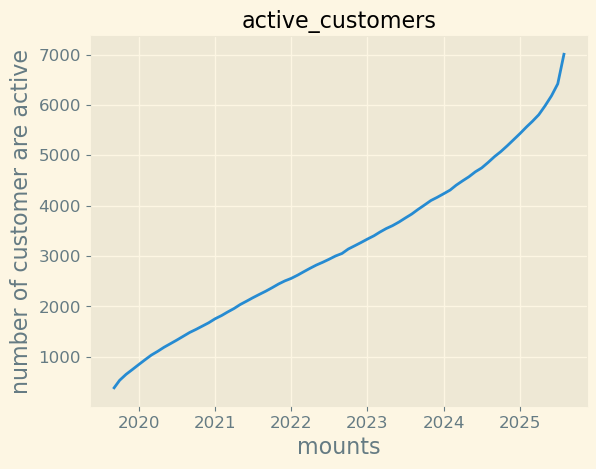

In [34]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
ax.plot(active_customers_df['month'],active_customers_df['active_customers'],linewidth=2)
ax.set_title('active_customers',fontsize=16)
ax.set_xlabel('mounts',fontsize=16)
ax.set_ylabel('number of customer are active',fontsize=16)

ax.tick_params(axis='both',labelsize=12)


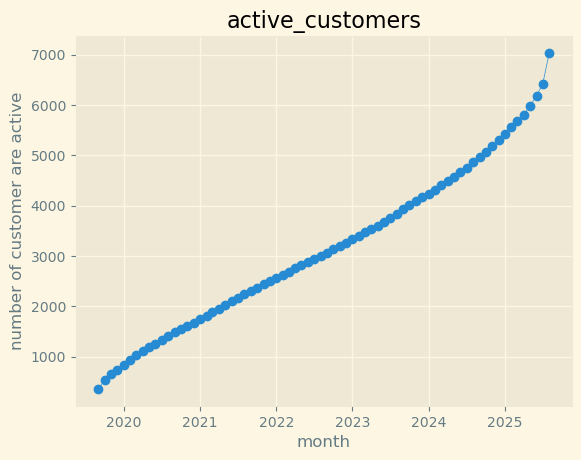

In [35]:
plt.plot(active_customers_df['month'],active_customers_df['active_customers'],marker='o', linewidth=0.5)
plt.title('active_customers')
plt.xlabel('month')
plt.ylabel('number of customer are active')
plt.grid(True)
plt.show()

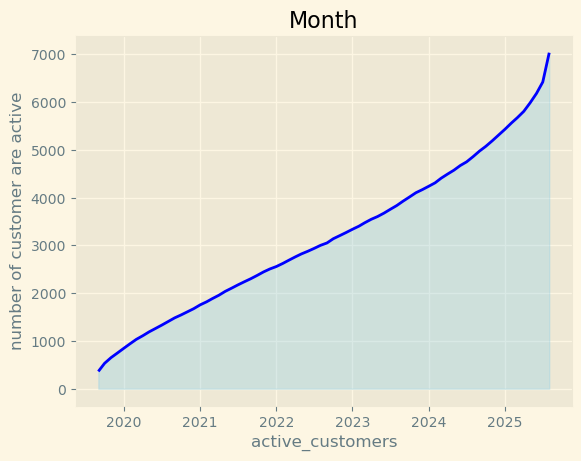

In [36]:
plt.fill_between(active_customers_df['month'],active_customers_df['active_customers'], color='skyblue', alpha=0.3)
plt.plot(active_customers_df['month'],active_customers_df['active_customers'], color='blue', linewidth=2)
plt.title('Month')
plt.xlabel('active_customers')
plt.ylabel('number of customer are active')
plt.show()

### Customers who haven't made a purchase in over 90 days:
### Average purchase in different categories

In [37]:
buy=[]
for i in df['MonthlyCharges']:
    buy.append(i)

In [38]:
maximum_value = min(buy)
print(maximum_value)

100


In [39]:
last_month = current_date - pd.DateOffset(months=1)

In [40]:
last_month

Timestamp('2025-07-29 00:00:00')

In [41]:
active = df[df['Contract']=='One year'][['Contract','MonthlyCharges','TotalCharges']]

In [42]:
active

,Contract,MonthlyCharges,TotalCharges
1,One year,56.95,1889.5
3,One year,42.3,1840.75
9,One year,56.15,3487.95
12,One year,100.35,5681.1
16,One year,20.65,1022.95
...,...,...,...
7022,One year,104.95,7544.3
7031,One year,60,3316.1
7036,One year,60.65,743.3
7038,One year,84.8,1990.5


In [43]:
# df['Contract'] = (df['Contract']!='One year').map({True:1,
#                                                        False:0,                                                    
df['Contract'] = df['Contract'].map({'One year': 1, 'Month-to-month':0, 'Two year':2})


In [44]:
df['Contract']

0       0.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
7039    1.0
7040    0.0
7041    0.0
7042    2.0
7043    NaN
Name: Contract, Length: 7044, dtype: float64

In [45]:
active = df[df['Contract']==1][['Contract','MonthlyCharges','TotalCharges']]
active

,Contract,MonthlyCharges,TotalCharges
1,1.0,56.95,1889.5
3,1.0,42.3,1840.75
9,1.0,56.15,3487.95
12,1.0,100.35,5681.1
16,1.0,20.65,1022.95
...,...,...,...
7022,1.0,104.95,7544.3
7031,1.0,60,3316.1
7036,1.0,60.65,743.3
7038,1.0,84.8,1990.5


In [47]:
df.groupby('gender')['MonthlyCharges'].mean()

In [ ]:
df.groupby('Contract')['MonthlyCharges'].mean()

In [51]:
# standard deviation :
df.groupby('Contract')['MonthlyCharges'].std() 

In [52]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
7043        NaN
Name: TotalCharges, Length: 7044, dtype: float64

- Convert column values ​​['TotalCharges'] to numeric values ​​and convert to NAN if there is a non-numeric value

In [53]:
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['MonthlyCharges']

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7039    103.20
7040     29.60
7041     74.40
7042    105.65
7043       NaN
Name: MonthlyCharges, Length: 7044, dtype: float64

In [54]:
df.groupby('gender')['TotalCharges'].mean()

gender
Female    2283.190985
Male      2283.407861
gender            NaN
Name: TotalCharges, dtype: float64

In [55]:
df.groupby('MultipleLines')['TotalCharges'].mean()

MultipleLines
MultipleLines               NaN
No                  1349.833058
No phone service    1500.433750
Yes                 3527.700994
Name: TotalCharges, dtype: float64

In [56]:
df.isna().sum() / df.shape[0] * 100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.014196
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.014196
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.014196
TotalCharges        0.170358
Churn               0.000000
start_date          0.000000
end_date            0.000000
dtype: float64

- Clean data(NAN)

In [57]:
df.dropna(inplace=True)

In [58]:
df.isna().sum() / df.shape[0] * 100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
start_date          0.0
end_date            0.0
dtype: float64

In [59]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,start_date,end_date
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,0.0,Yes,Electronic check,29.85,29.85,No,2025-07-29,2025-08-29
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,No,No,1.0,No,Mailed check,56.95,1889.50,No,2022-10-29,2025-08-29
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,0.0,Yes,Mailed check,53.85,108.15,Yes,2025-06-29,2025-08-29
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,No,No,1.0,No,Bank transfer (automatic),42.30,1840.75,No,2021-11-29,2025-08-29
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,0.0,Yes,Electronic check,70.70,151.65,Yes,2025-06-29,2025-08-29


In [60]:
# df[list("MonthlyCharges")] = df[list("MonthlyCharges")].fillna(0.0).astype(int)

# test['MonthlyCharges'] = df['MonthlyCharges'].applymap(np.int32)

df['MonthlyCharges'] = df['MonthlyCharges'].apply(np.int64)

# print(df)


In [61]:
type(df['MonthlyCharges'])

pandas.core.series.Series

In [62]:
df['MonthlyCharges'].shape

(7032,)

In [63]:
df['MonthlyCharges']

0        29
1        56
2        53
3        42
4        70
       ... 
7038     84
7039    103
7040     29
7041     74
7042    105
Name: MonthlyCharges, Length: 7032, dtype: int64

- Average monthly purchase

In [64]:
mean = sum(df['MonthlyCharges']) / len(df['MonthlyCharges'])

In [65]:
mean

64.33248009101251

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   gender            7032 non-null   object        
 2   SeniorCitizen     7032 non-null   object        
 3   Partner           7032 non-null   object        
 4   Dependents        7032 non-null   object        
 5   tenure            7032 non-null   float64       
 6   PhoneService      7032 non-null   object        
 7   MultipleLines     7032 non-null   object        
 8   InternetService   7032 non-null   object        
 9   OnlineSecurity    7032 non-null   object        
 10  OnlineBackup      7032 non-null   object        
 11  DeviceProtection  7032 non-null   object        
 12  TechSupport       7032 non-null   object        
 13  StreamingTV       7032 non-null   object        
 14  StreamingMovies   7032 non-nu

In [67]:
df['Churn'] = (df['Churn']!='No').map({True:1,
                                                       False:0})

In [68]:
convert_to_0_1 = df['Contract']
convert_to_0_1

0       0.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
7038    1.0
7039    1.0
7040    0.0
7041    0.0
7042    2.0
Name: Contract, Length: 7032, dtype: float64

- stay = 0
- left = 1

* Between those who stayed "0" and those who left "1", it shows those who were with the company for 12 months, and compares it with monthly, one-year and two-year contracts, 
which shows those who had a 1-month contract but stayed with the company for 12 months. While the contract was 1 month

<Axes: xlabel='Churn', ylabel='count'>

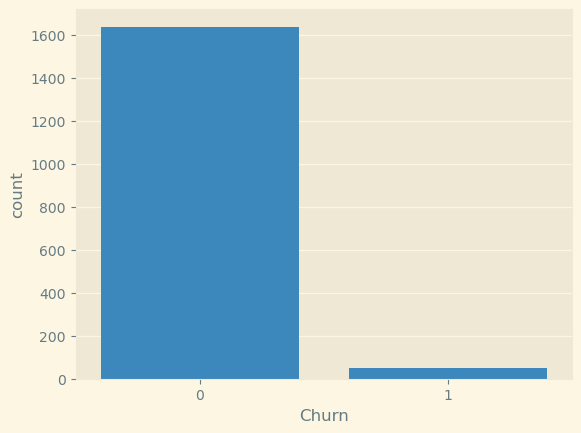

In [69]:
sns.countplot(x='Churn', data=df[df['Contract'] == 2])     

- The average number of months the customer stays with the organization.

In [70]:
mean = sum(df['tenure']) / len(df['tenure'])

In [71]:
mean

32.421786120591584

In [72]:
df.groupby('Churn')['tenure'].mean()

Churn
0    37.650010
1    17.979133
Name: tenure, dtype: float64

* Customers that stay and leave, but we made a bet that it shows customers who have been with the organization for 32 months.

<Axes: xlabel='Churn', ylabel='count'>

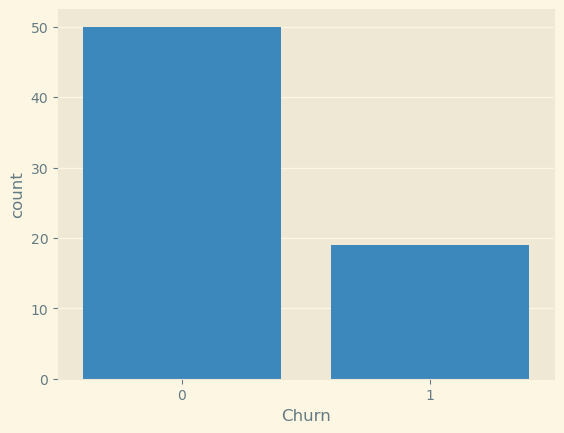

In [73]:
sns.countplot(x='Churn', data=df[df['tenure'] == 32])

- Shows and compares customers who stay and leave on a 12-month contract with customers who have 1-month, 1-year, and 2-year contracts.

<Axes: xlabel='Churn', ylabel='count'>

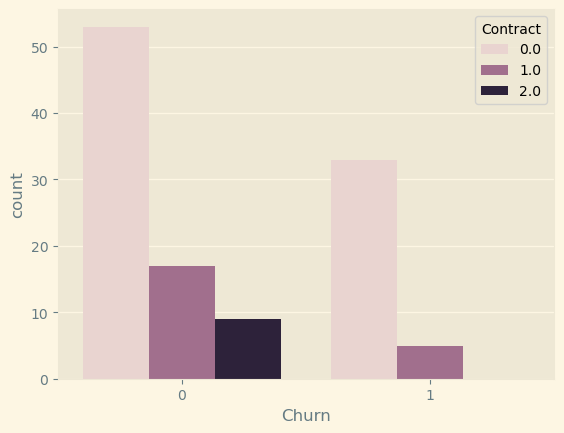

In [74]:
sns.countplot(x = 'Churn',
              data = df[df['tenure'] == 12],
              hue = 'Contract')

- Customers who have a 1-month contract report how many churn and how many loyal customers they have (staying in the organization).

<Axes: xlabel='Churn', ylabel='count'>

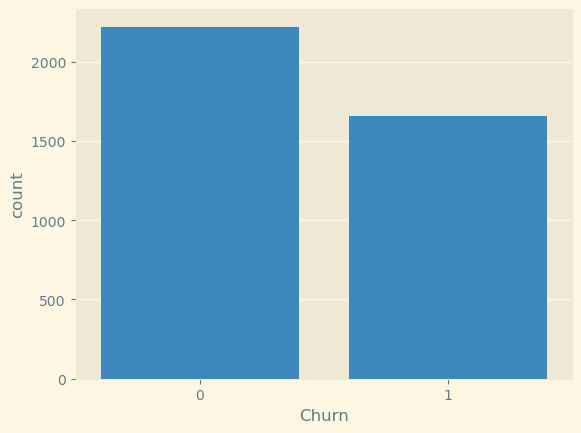

In [75]:
sns.countplot(x='Churn',
              data=df[df['Contract'] == 0],
              )

- Check which contract is more popular to percentage.
- Analysis of the distribution of contracts among customers to percentage.

In [76]:
percentage_Churn=(df['Churn'].value_counts()/df['Churn'].count())*100

In [77]:
percentage_Contract=(df['Contract'].value_counts()/df['Contract'].count())*100

In [78]:
print(f'Number of loyal and unloyal customers: {percentage_Churn}')
print(f'Shows which contract is more popular: {percentage_Contract}')

Number of loyal and unloyal customers: Churn
0    73.421502
1    26.578498
Name: count, dtype: float64
Shows which contract is more popular: Contract
0.0    55.105233
2.0    23.961889
1.0    20.932878
Name: count, dtype: float64


<Axes: xlabel='Contract', ylabel='count'>

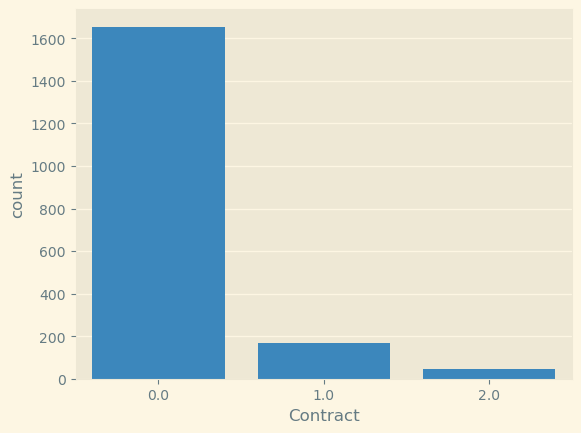

In [79]:
sns.countplot(x='Contract',
              data=df[df['Churn'] == 1],
             )

#### Percentage of decline between one-month and long-term contracts :

In [80]:
result = df.groupby('Contract').agg(
    total_customers=('Contract', 'count'),
    churned_customers=('Churn', lambda x: (x == 1).sum())
)

result['Churn_rate_percent'] = (result['churned_customers'] / result['total_customers'] * 100).round(2)

In [81]:
print(df['Churn'].unique())

[0 1]


In [82]:
print(df['Churn'].value_counts(dropna=False))

Churn
0    5163
1    1869
Name: count, dtype: int64


In [83]:
result['Churn_rate_percent']

Contract
0.0    42.71
1.0    11.28
2.0     2.85
Name: Churn_rate_percent, dtype: float64

- This table shows that monthly contracts with a "0" rating have the highest churn and the highest retention in the organization, which could indicate customer dissatisfaction.
- One-year contracts are half the customer acquisition rate of monthly contracts, but have a low churn rate of 11 percent, indicating that there are very few dissatisfied customers in this contract.
- Two-year contracts show that their customer retention is similar to one-year contracts, and they have a very low churn rate among the three types of contracts, and the majority of customers are loyal, and ultimately loyal customers are formed by one-year and two-year contracts.

In [84]:
result

,total_customers,churned_customers,Churn_rate_percent
Contract,,,
0.0,3875,1655,42.71
1.0,1472,166,11.28
2.0,1685,48,2.85


In [85]:
df.groupby('Churn')['Contract'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,5163.0,0.887081,0.856994,0.0,0.0,1.0,2.0,2.0
1,1869.0,0.140182,0.414714,0.0,0.0,0.0,0.0,2.0


In [86]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,start_date,end_date
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,0.0,Yes,Electronic check,29,29.85,0,2025-07-29,2025-08-29
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,No,No,1.0,No,Mailed check,56,1889.50,0,2022-10-29,2025-08-29
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,0.0,Yes,Mailed check,53,108.15,1,2025-06-29,2025-08-29
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,No,No,1.0,No,Bank transfer (automatic),42,1840.75,0,2021-11-29,2025-08-29
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,0.0,Yes,Electronic check,70,151.65,1,2025-06-29,2025-08-29


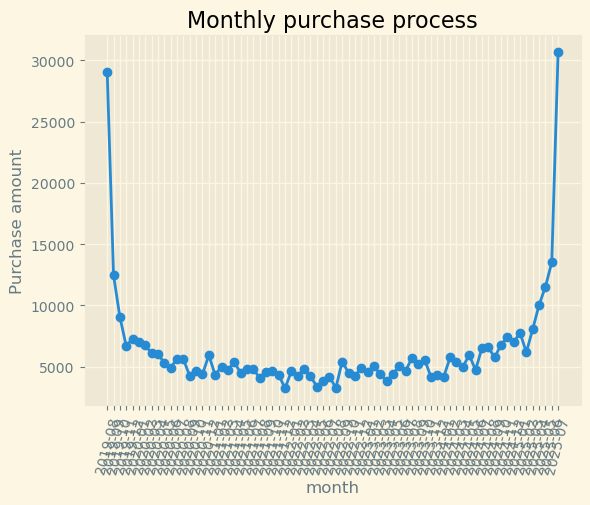

In [87]:
df['date'] = pd.to_datetime(df['start_date'])
df['month'] = df['date'].dt.to_period('M') # extract month

monthly_sales = df.groupby('month')['MonthlyCharges'].sum()

plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')
plt.xticks(rotation=75)
plt.xlabel('month')
plt.ylabel('Purchase amount')
plt.title('Monthly purchase process')
plt.grid(True)
plt.show()

In [88]:
new_patient = pd.DataFrame([500, 800, 1200, 2000, 3500, 4200, 10000, 15000])

In [89]:
q1 = df['MonthlyCharges'].quantile(0.25)
q2 = df['MonthlyCharges'].quantile(0.50)
q3 = df['MonthlyCharges'].quantile(0.75)

In [90]:
q1

np.float64(35.0)

In [91]:
q2

np.float64(70.0)

In [92]:
q3

np.float64(89.0)

In [93]:
df['MonthlyCharges'].max()

118

In [94]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,start_date,end_date,date,month
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,0.0,Yes,Electronic check,29,29.85,0,2025-07-29,2025-08-29,2025-07-29,2025-07
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,1.0,No,Mailed check,56,1889.50,0,2022-10-29,2025-08-29,2022-10-29,2022-10
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,0.0,Yes,Mailed check,53,108.15,1,2025-06-29,2025-08-29,2025-06-29,2025-06
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,1.0,No,Bank transfer (automatic),42,1840.75,0,2021-11-29,2025-08-29,2021-11-29,2021-11
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,0.0,Yes,Electronic check,70,151.65,1,2025-06-29,2025-08-29,2025-06-29,2025-06


#### This code groups the data by contract type (`Contract`) and for each group, calculates three quartiles of the `MonthlyCharges` column. The result is a new table that shows how the monthly charges are distributed across each contract type.

In [95]:
quarter_column_Contract= df.groupby('Contract').agg(
    q1_monthly=('MonthlyCharges', lambda x: x.quantile(0.25)),
    q2_monthly=('MonthlyCharges', lambda x: x.quantile(0.5)),
    q3_monthly=('MonthlyCharges', lambda x: x.quantile(0.75)))

In [96]:
quarter_column_Contract

,q1_monthly,q2_monthly,q3_monthly
Contract,,,
0.0,45.00,73.0,88.0
1.0,28.25,68.0,94.0
2.0,24.00,64.0,90.0


In [97]:
from scipy.stats import shapiro

stat, p = shapiro(df['start_date'])
print(f"P-value: {p}")

P-value: 8.19347576047095e-55


C:\Users\hamed\anaconda3\envs\Machin_learning\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7032.
  res = hypotest_fun_out(*samples, **kwds)


<Axes: >

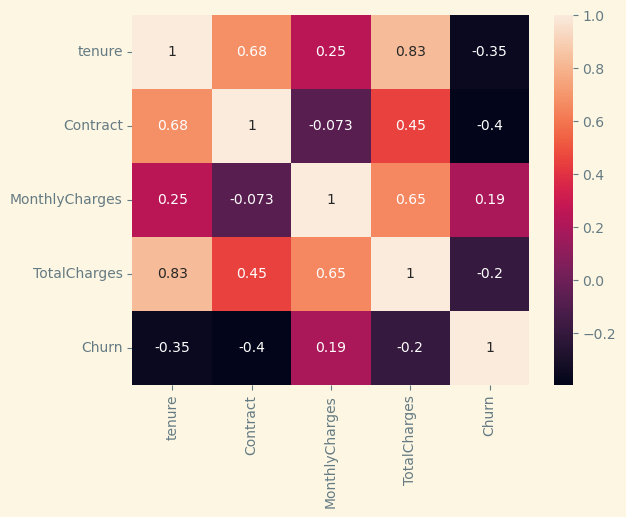

In [107]:
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True)

In [109]:
# df.select_dtypes(include='number').corr()
# corr= df.corr()
# sns.heatmap(corr)

In [105]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,start_date,end_date,date,month
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,0.0,Yes,Electronic check,29,29.85,0,2025-07-29,2025-08-29,2025-07-29,2025-07
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,1.0,No,Mailed check,56,1889.50,0,2022-10-29,2025-08-29,2022-10-29,2022-10
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,0.0,Yes,Mailed check,53,108.15,1,2025-06-29,2025-08-29,2025-06-29,2025-06
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,1.0,No,Bank transfer (automatic),42,1840.75,0,2021-11-29,2025-08-29,2021-11-29,2021-11
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,0.0,Yes,Electronic check,70,151.65,1,2025-06-29,2025-08-29,2025-06-29,2025-06


<Axes: >

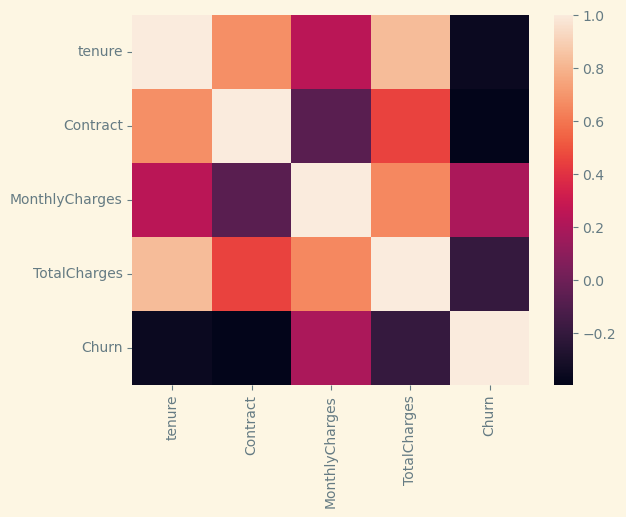

In [111]:
df.select_dtypes(include='number').corr()
corr= data_numeric.corr()
sns.heatmap(corr)

In [113]:
# انتخاب داده‌های عددی و محاسبه همبستگی
data_numeric = df.select_dtypes(include='number')
corr = data_numeric.corr()
corr


,tenure,Contract,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.676734,0.246876,0.825880,-0.354049
Contract,0.676734,1.000000,-0.072685,0.450306,-0.396150
MonthlyCharges,0.246876,-0.072685,1.000000,0.651126,0.192922
TotalCharges,0.825880,0.450306,0.651126,1.000000,-0.199484
Churn,-0.354049,-0.396150,0.192922,-0.199484,1.000000


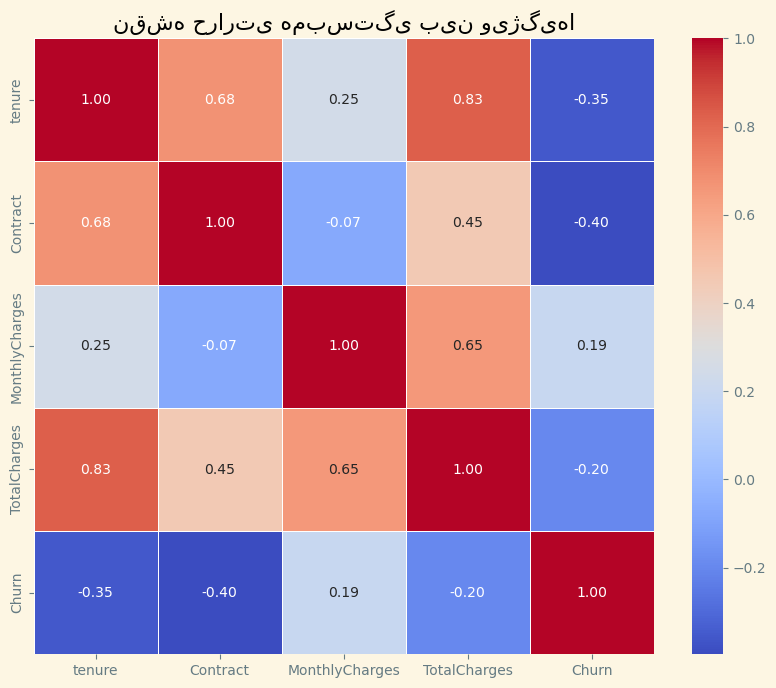

In [102]:
# رسم Heatmap با تنظیمات ظاهری
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("نقشه حرارتی همبستگی بین ویژگی‌ها")
plt.show()

In [ ]:
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'MonthlyCharges': [20, 25, 30, 35, 40, 45, 50, 55, 60, 65],
    'Contract': ['Month-to-month', 'Month-to-month', 'One year', 'One year', 
                 'Two year', 'Two year', 'Month-to-month', 'One year', 
                 'Two year', 'Month-to-month']
}

df = pd.DataFrame(data)


q1 = df['MonthlyCharges'].quantile(0.25)
q2 = df['MonthlyCharges'].quantile(0.50)
q3 = df['MonthlyCharges'].quantile(0.75)

print(q1, q2, q3)



def categorize(value):
    if value <= q1:
        return 'کم‌خرج'
    elif value <= q3:
        return 'متوسط'
    else:
        return 'پرخرج'

df['Category'] = df['MonthlyCharges'].apply(categorize)
print(df)

result = df.groupby('CustomerID')['MonthlyCharges'].apply(lambda x: x.quantile(0.25))
print(result)

# persent = df['MonthlyCharges']
# result = persent.apply(lambda x : x + 10)
# print(result)

# print(df.apply(sum, axis=0))
# print(df.apply(sum, axis=1))


# df = pd.DataFrame({
#     'Group': ['A', 'A', 'B', 'B'],
#     'Value': [10, 20, 30, 40]
# })

# result = df.groupby('Group')['Value'].apply(lambda x: x.quantile(0.25))
# print(result)

In [ ]:
import pandas as pd

data = {
    'Month': ['2025-01', '2025-01', '2025-02', '2025-02', '2025-03', '2025-03'],
    'ChurnRate': [0.05, 0.08, 0.06, 0.09, 0.07, 0.10],
    'ContractType': ['Monthly', 'Annual', 'Monthly', 'Annual', 'Monthly', 'Annual']
}
df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'])
df

In [ ]:
import plotly.io as pio
pio.renderers.default = 'notebook'  # یا 'iframe' یا 'notebook_connected'

In [ ]:
pio.renderers.default = 'iframe'

In [ ]:
import plotly.graph_objects as go

# لیست انواع قرارداد
contract_types = df['ContractType'].unique()

# ساخت نمودار
fig = go.Figure()

for contract in contract_types:
    filtered_df = df[df['ContractType'] == contract]
    fig.add_trace(go.Scatter(
        x=filtered_df['Month'],
        y=filtered_df['ChurnRate'],
        mode='lines+markers',
        name=contract,
        visible=(contract == contract_types[0])  # فقط اولین دسته پیش‌فرض نمایش داده می‌شود
    ))

# ساخت دکمه‌های فیلتر
buttons = []
for i, contract in enumerate(contract_types):
    visibility = [False] * len(contract_types)
    visibility[i] = True
    buttons.append(dict(
        label=contract,
        method='update',
        args=[{'visible': visibility},
              {'title': f"Churn Rate Over Time - {contract} Contract"}]
    ))

fig.update_layout(
    title=f"Churn Rate Over Time - {contract_types[0]} Contract",
    xaxis_title='Month',
    yaxis_title='Churn Rate',
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=0.1,
        xanchor='left',
        y=1.15,
        yanchor='top'
    )],
    template='plotly_white'
)

fig.show()